In [1]:
from pymongo import MongoClient
from pprint import pprint
from typing import List

DB = 'top_songs'

# DB CONFIG
client = MongoClient('mongo', 27017)
db = client.music_db
songs_collection = db[DB]

In [2]:
SONGS = list(songs_collection.find())

In [3]:
# Require audio features to be present
songs = [song for song in SONGS if song.get('spotify', {}).get('audio_features') and song.get('gender')]
len(songs)

1393

In [90]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
import pandas as pd
import matplotlib.pyplot as plt
from typing import List
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from multiprocessing import Pool

# Lyrics word count
# Lyric emotion

def lyric_count(song):
    words = song['lyrics']['result']['track']['text'].replace('\n', ' ')
    return len(words.split(' '))

def filter_has_lyrics(songs):
    lst = []
    for song in songs:
        try:
            song['lyrics']['result']['track']['text']
        except Exception:
            continue
        else:
            lst.append(song)
    return lst

II = 0

def lyric_emotion(song):
    lyrics = song['lyrics']['result']['track']['text']
    lyrics = lyrics.split("\n")
    
    compound_score = 0
    for sentence in lyrics:
        sid = SentimentIntensityAnalyzer()
        ss = sid.polarity_scores(sentence)
        compound_score += ss['compound']
    
    return compound_score / len(lyrics)   # AVG compound score


def update_single_dict_data(song, meta=False, emotion=True):
    global II
    II += 1
    d = {**song['spotify']['audio_features']}
    if meta:
        d.update({'title': song['title'], 
                  'artist': song['artist'],
                 })
    if emotion:
        d.update({'emotion': lyric_emotion(song)})
        
    d.update({'lyric_count': lyric_count(song),
              'gender': 0 if song['gender'] == 'female' else 1
             })

    del d['analysis_url'], d['track_href'], d['uri'], d['type'], d['id']
    return d
    
def dict_data(songs, meta=False):
    dicts = []
    for song in songs:
        d = update_single_dict_data(song)
        dicts.append(d)
    return dicts

def parallel_dict_data(songs):
    with Pool(processes=10) as pool:
        results = pool.map(update_single_dict_data, songs)
    return results

songs = filter_has_lyrics(songs)
spotify_data = parallel_dict_data(songs)


In [91]:
df = pd.DataFrame(spotify_data)
df

,acousticness,danceability,duration_ms,emotion,energy,gender,instrumentalness,key,liveness,loudness,lyric_count,mode,speechiness,tempo,time_signature,valence
0,0.000041,0.624,202456,0.073871,0.546,1,0.845000,8,0.1100,-9.578,423,1,0.2200,183.329,4,0.1600
1,0.892000,0.680,203778,0.100230,0.263,1,0.000000,1,0.1390,-15.722,504,0,0.9300,97.262,4,0.6840
2,0.403000,0.470,243216,0.106350,0.438,0,0.903000,6,0.1460,-14.648,788,0,0.0498,84.388,4,0.0758
3,0.976000,0.699,225448,0.063830,0.194,0,0.944000,9,0.1130,-12.599,496,0,0.0448,114.966,4,0.1900
4,0.232000,0.497,227727,0.075359,0.364,0,0.776000,0,0.1090,-15.471,517,1,0.0513,190.071,4,0.0343
5,0.067200,0.734,305455,-0.033659,0.423,0,0.862000,4,0.0517,-12.856,914,1,0.3280,87.989,4,0.5000
6,0.992000,0.556,276674,0.241059,0.241,1,0.953000,8,0.1980,-14.010,296,1,0.0676,186.038,3,0.2270
7,0.112000,0.742,237053,-0.051557,0.481,1,0.931000,2,0.1090,-11.510,455,1,0.4300,156.030,1,0.2020
8,0.982000,0.400,228870,-0.025386,0.169,0,0.954000,6,0.1140,-12.988,467,1,0.0479,95.995,4,0.0794
9,0.000181,0.476,273735,0.006700,0.643,1,0.645000,8,0.2050,-8.848,237,1,0.0461,150.066,4,0.1430


## Euclidean Distances

In [92]:
from sklearn.cluster import KMeans
from sklearn import metrics
import scipy
import numpy as np

ary = scipy.spatial.distance.cdist(df.iloc[:,1:], df.iloc[:,1:], metric='euclidean')
X = pd.DataFrame(ary)

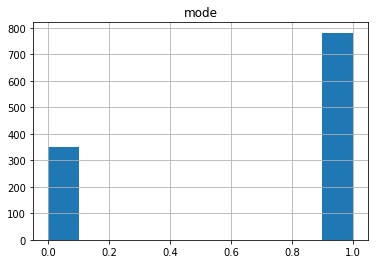

In [93]:
import os

def plot_and_save(column_name, **kwargs):
    fig, ax = plt.subplots()
    if DB == 'songs':
        df.hist(column_name,ax=ax, **kwargs, color='green')
    else:
        df.hist(column_name, ax=ax, **kwargs)
        
    savefig(fig, column_name)

def savefig(fig, name):
    fig.savefig(f'{DB}/{name}_{DB}.png')


if not os.path.exists(DB):
    os.mkdir(DB)
    
# plot_and_save('lyric_count')
# plot_and_save('duration_ms')
# plot_and_save('key', bins=12)
# plot_and_save('emotion', bins=12)

# df.hist('gender', bins=6)
plot_and_save('mode')

In [205]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]


def custom_round(x, base=5):
    return float(base * round(float(x)/base))

mydf = df
# mydf['tempo'] = mydf['tempo'].apply(lambda x: custom_round(x, base=50))
mydf[:3]

,acousticness,danceability,duration_ms,emotion,energy,gender,instrumentalness,key,liveness,loudness,lyric_count,mode,speechiness,tempo,time_signature,valence
0,0.000041,0.624,202456,0.073871,0.546,1,0.845,8,0.110,-9.578,423,1,0.2200,183.329,4,0.1600
1,0.892000,0.680,203778,0.100230,0.263,1,0.000,1,0.139,-15.722,504,0,0.9300,97.262,4,0.6840
2,0.403000,0.470,243216,0.106350,0.438,0,0.903,6,0.146,-14.648,788,0,0.0498,84.388,4,0.0758


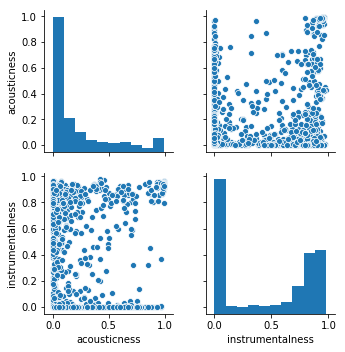

In [127]:
data = mydf[['acousticness','instrumentalness']]
sns_plot = sns.pairplot(data)


In [182]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)  

cluster = DBSCAN(eps=0.05, metric='euclidean', min_samples=5)
cluster = cluster.fit(data)


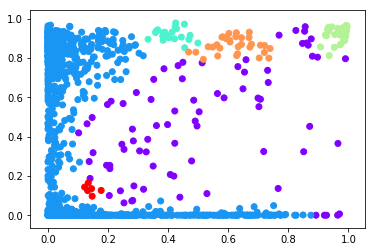

In [179]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=cluster.labels_, cmap='rainbow')


In [187]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=500)
kmeans =  MeanShift(bandwidth=bandwidth, bin_seeding=True)#(n_clusters=5)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)



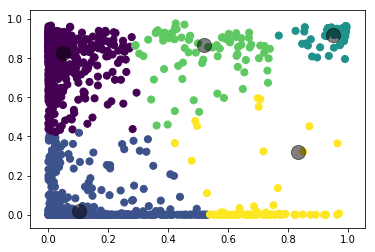

In [188]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


In [30]:
savefig(sns_plot, "figure-pairvalence")

In [206]:
from sklearn.decomposition import PCA
data = mydf
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

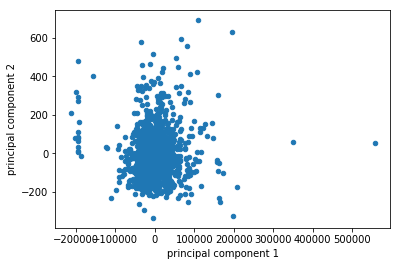

In [207]:
principalDf.plot.scatter(0, 1)

In [210]:
pca.explained_variance_ratio_

array([  9.99992646e-01,   6.97082157e-06])

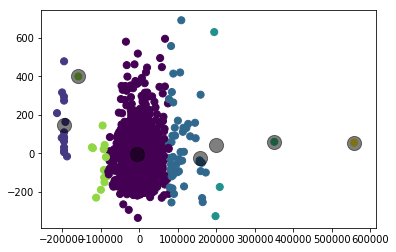

In [215]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(principalDf, quantile=0.2, n_samples=500)
kmeans =  MeanShift(bandwidth=bandwidth, bin_seeding=True)#(n_clusters=5)
kmeans.fit(principalDf)
y_kmeans = kmeans.predict(principalDf)

plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
